# Credit_Scoring

***Importing Libraries***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

***Importing Dataset***

In [2]:
df=pd.read_excel('Dataset_CreditScoring.xlsx')

In [3]:
df.head()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000


***Data Manipulation***

In [4]:
#cheking missing values
df.isna().sum()

TARGET               0
ID                   0
DerogCnt             0
CollectCnt           0
BanruptcyInd         0
InqCnt06             0
InqTimeLast        188
InqFinanceCnt24      0
TLTimeFirst          0
TLTimeLast           0
TLCnt03              0
TLCnt12              0
TLCnt24              0
TLCnt                3
TLSum               40
TLMaxSum            40
TLSatCnt             4
TLDel60Cnt           0
TLBadCnt24           0
TL75UtilCnt         99
TL50UtilCnt         99
TLBalHCPct          41
TLSatPct             4
TLDel3060Cnt24       0
TLDel90Cnt24         0
TLDel60CntAll        0
TLOpenPct            3
TLBadDerogCnt        0
TLDel60Cnt24         0
TLOpen24Pct          3
dtype: int64

<Axes: >

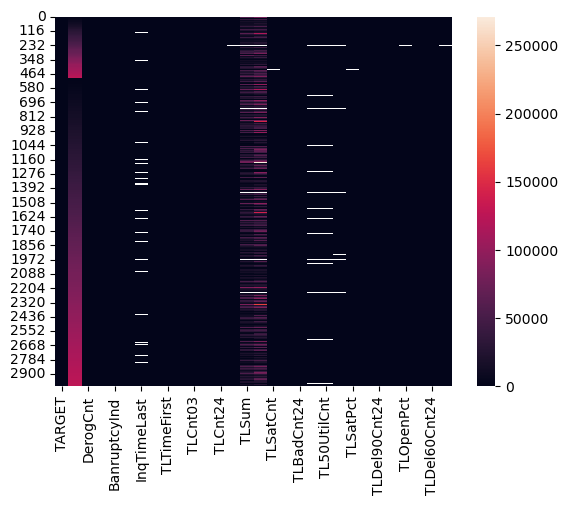

In [5]:
#visualise missing values
sns.heatmap(df)

In [6]:
#filling missing values with mean
df=df.fillna(df.mean())

<Axes: >

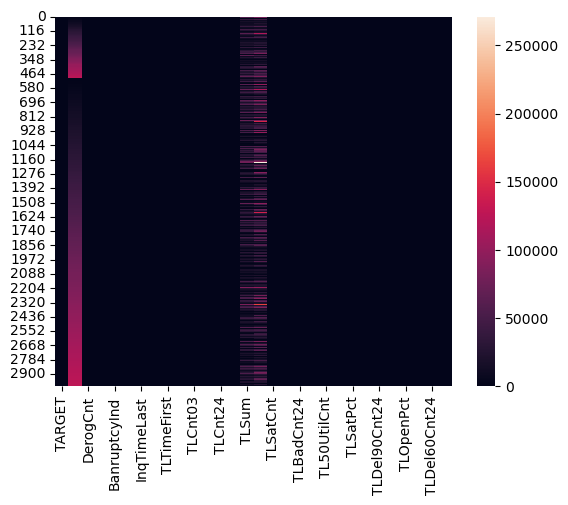

In [7]:
#cheking missing values with heat map
sns.heatmap(df)

# Train Model

In [8]:
y = df.iloc[:, 0].values
X = df.iloc[:, 1:29].values

In [12]:
# splitting dataset into training and test (in ratio 80:20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0,
                                                    stratify=y)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
classifier =  LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [16]:
print(confusion_matrix(y_test,y_pred))

[[487  13]
 [ 87  13]]


In [17]:
print(accuracy_score(y_test, y_pred))

0.8333333333333334
